Columns in df1: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')
Columns in df2: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


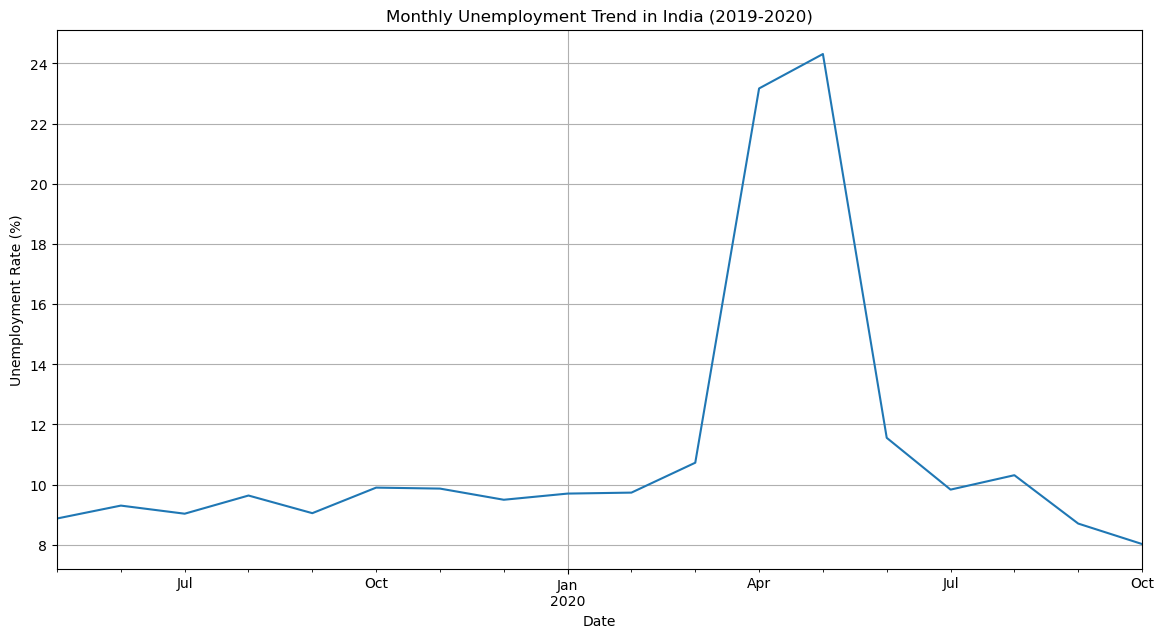

Average Unemployment Rate:
Pre-COVID: 9.48%
During COVID: 15.31%


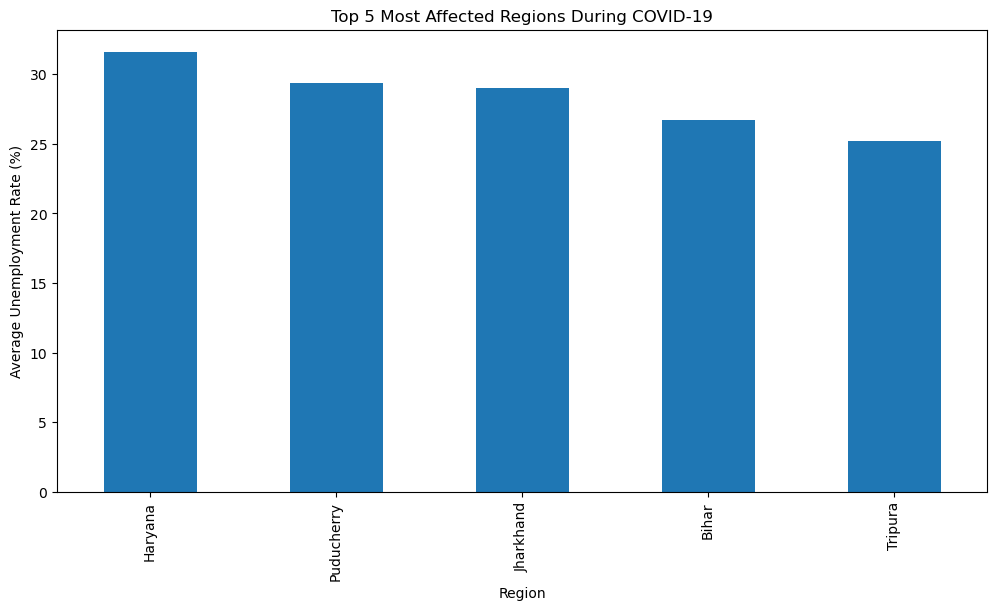

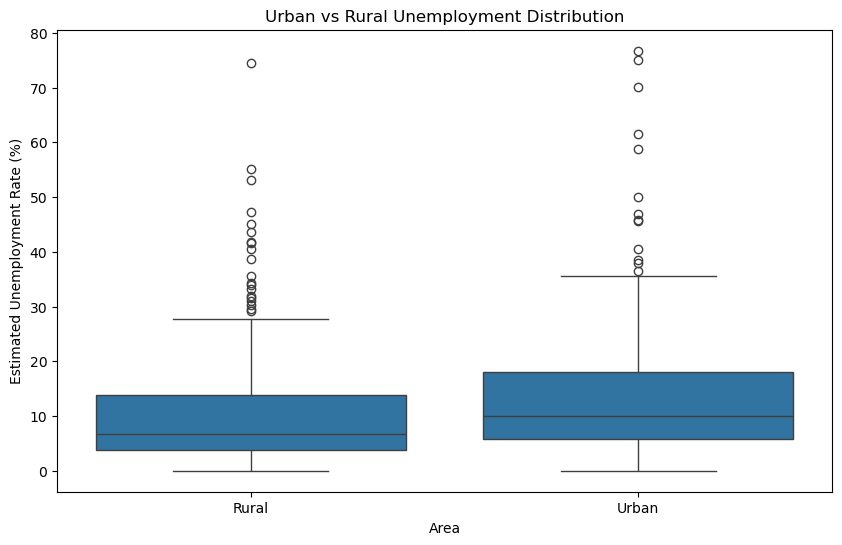


Worst COVID Month: May 2020


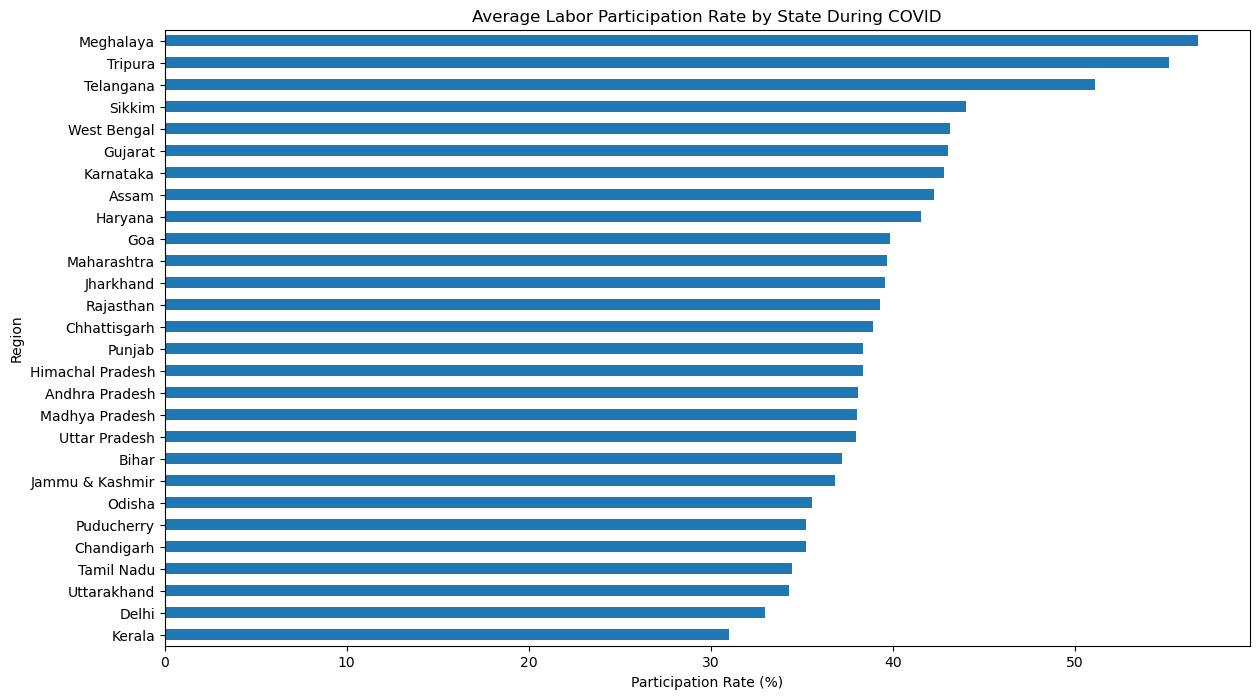

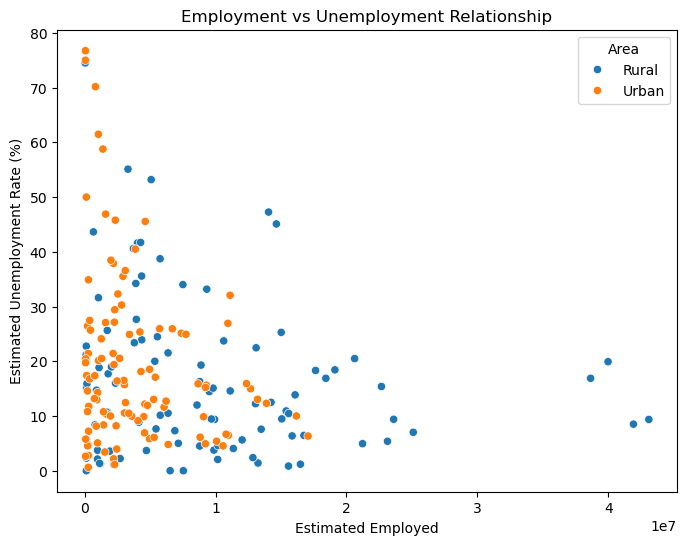

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets
try:
    df1 = pd.read_csv("C:\\Users\\deepi\\Downloads\\archive (4)\\Unemployment_Rate_upto_11_2020.csv")
    df2 = pd.read_csv("C:\\Users\\deepi\\Downloads\\archive (4)\\Unemployment in India.csv")
except FileNotFoundError:
    print("Error: One or both files not found! Check the filenames and directory.")
    exit()

# Check column names
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)

# Strip spaces from column names (if any)
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Ensure Date column exists; rename if necessary
if "Date" not in df1.columns:
    df1.rename(columns={df1.columns[0]: "Date"}, inplace=True)
if "Date" not in df2.columns:
    df2.rename(columns={df2.columns[0]: "Date"}, inplace=True)

# Convert Date column to datetime format (Fixes warnings)
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce', dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce', dayfirst=True)

# Combine datasets
combined_df = pd.concat([df1, df2], ignore_index=True)

# Drop duplicates and missing values in key columns
combined_df = combined_df.dropna(subset=['Date', 'Estimated Unemployment Rate (%)'])
combined_df = combined_df.drop_duplicates()

# Filter COVID-19 period (March 2020 onwards)
covid_df = combined_df[combined_df['Date'] >= '2020-03-01']

# ======================
# Key Analysis & Visualizations
# ======================

# 1️⃣ Overall Unemployment Trend
plt.figure(figsize=(14,7))
combined_df.groupby(combined_df['Date'].dt.to_period('M'))['Estimated Unemployment Rate (%)'].mean().plot()
plt.title('Monthly Unemployment Trend in India (2019-2020)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

# 2️⃣ COVID-19 Impact Comparison
pre_covid = combined_df[combined_df['Date'] < '2020-03-01']
post_covid = combined_df[combined_df['Date'] >= '2020-03-01']

print(f"Average Unemployment Rate:")
print(f"Pre-COVID: {pre_covid['Estimated Unemployment Rate (%)'].mean():.2f}%")
print(f"During COVID: {post_covid['Estimated Unemployment Rate (%)'].mean():.2f}%")

# 3️⃣ Regional Analysis (Top 5 Most Affected)
plt.figure(figsize=(12,6))
covid_df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 Most Affected Regions During COVID-19')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

# 4️⃣ Rural vs Urban Comparison
plt.figure(figsize=(10,6))
sns.boxplot(x='Area', y='Estimated Unemployment Rate (%)', data=combined_df)
plt.title('Urban vs Rural Unemployment Distribution')
plt.show()

# 5️⃣ Worst Month Analysis
worst_month = covid_df.groupby('Date')['Estimated Unemployment Rate (%)'].mean().idxmax()
print(f"\nWorst COVID Month: {worst_month.strftime('%B %Y')}")

# 6️⃣ State-wise Labor Participation During COVID
plt.figure(figsize=(14,8))
covid_df.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().sort_values().plot(kind='barh')
plt.title('Average Labor Participation Rate by State During COVID')
plt.xlabel('Participation Rate (%)')
plt.show()

# 7️⃣ Unemployment vs Employment Correlation
plt.figure(figsize=(8,6))

# Drop missing values before scatter plot
covid_df = covid_df.dropna(subset=['Estimated Employed', 'Estimated Unemployment Rate (%)'])

sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', data=covid_df, hue='Area')
plt.title('Employment vs Unemployment Relationship')
plt.show()